# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [45]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
from sklearn import svm, tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

### Feature extraction and Engineering techniques

In [8]:
train_dataset.shape

(12017, 11)

In [9]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [10]:
train_dataset.isnull().sum()#there is no missing data 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [11]:
train_dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


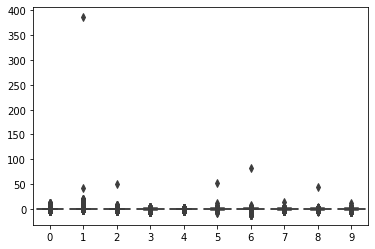

In [12]:
sns.boxplot(data=train_dataset)

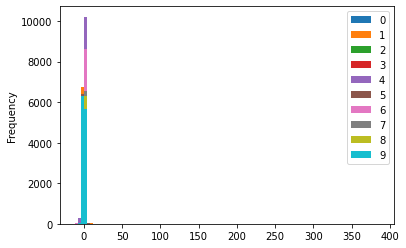

In [13]:
train_dataset.plot.hist(bins=100)

In [14]:
train_dataset.rename(columns={"0": "intercolumnar distance","1": "upper margin","2": "lower margin","3": "exploitation","4": "row number","5": "modular ratio","6": "interlinear spacing","7": "weight","8": "peak number",
"9": "modular ratio/ interlinear spacing","10":"samples"}, inplace=True)
train_dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,samples
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


In [15]:
corr = train_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
intercolumnar distance,1.000000,-0.034603,0.040097,-0.050536,0.406481,-0.051888,-0.034114,-0.064320,0.074687,-0.006808
upper margin,-0.034603,1.000000,0.405835,-0.003220,-0.063053,0.396154,0.575370,0.036323,0.318548,-0.026659
lower margin,0.040097,0.405835,1.000000,0.128052,0.000590,0.108497,0.279027,0.030528,0.162520,-0.064532
exploitation,-0.050536,-0.003220,0.128052,1.000000,0.084093,0.254600,0.066038,0.357121,0.274736,0.304903
row number,0.406481,-0.063053,0.000590,0.084093,1.000000,0.042959,0.019530,-0.078455,0.279677,0.145087
modular ratio,-0.051888,0.396154,0.108497,0.254600,0.042959,1.000000,0.469109,-0.035121,0.220883,0.776504
interlinear spacing,-0.034114,0.575370,0.279027,0.066038,0.019530,0.469109,1.000000,0.024779,0.264194,0.299467
weight,-0.064320,0.036323,0.030528,0.357121,-0.078455,-0.035121,0.024779,1.000000,0.500367,0.006262
peak number,0.074687,0.318548,0.162520,0.274736,0.279677,0.220883,0.264194,0.500367,1.000000,0.200680
modular ratio/ interlinear spacing,-0.006808,-0.026659,-0.064532,0.304903,0.145087,0.776504,0.299467,0.006262,0.200680,1.000000


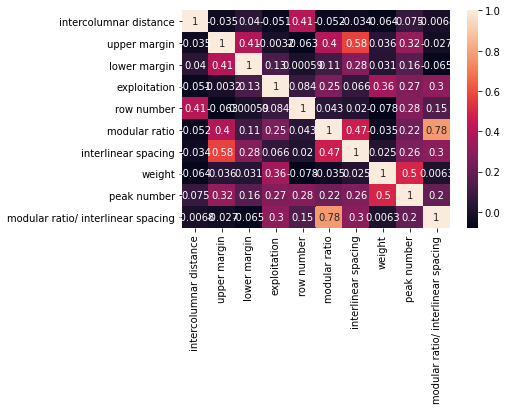

In [16]:
sns.heatmap(corr, annot=True)

In [17]:
samples=list(train_dataset["samples"].unique())# categorical data
samples

['Marcus',
 'Clarius',
 'Philippus',
 'Mongucus',
 'Ubuntius',
 'Coronavirucus',
 'Esequlius',
 'Paithonius']

In [18]:
#train_dataset["samples"]=pd.Categorical(train_dataset["samples"],ordered=True,categories =samples)
#train_dataset["samples_category"]=train_dataset["samples"].cat.codes
#train_dataset["samples_category"].value_counts()

# Challenge - train your models, make the best prediction

In [20]:
# Asignamos las features a la X 
X=train_dataset.drop(columns="samples")
y=train_dataset["samples"]
display(X.head(),y.head())

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030


0       Marcus
1      Clarius
2    Philippus
3    Philippus
4    Philippus
Name: samples, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(9613, 10) (2404, 10)


In [22]:
# Model 1
logistic_model=LogisticRegression(solver="lbfgs").fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

      Clarius       0.40      0.11      0.18       460
Coronavirucus       0.90      0.90      0.90       215
    Esequlius       0.00      0.00      0.00        78
       Marcus       0.55      0.92      0.69      1039
     Mongucus       0.75      0.68      0.71       110
   Paithonius       0.41      0.14      0.21       120
    Philippus       0.50      0.29      0.37       277
     Ubuntius       0.00      0.00      0.00       105

     accuracy                           0.57      2404
    macro avg       0.44      0.38      0.38      2404
 weighted avg       0.51      0.57      0.50      2404



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      Clarius       0.90      0.82      0.86       460
Coronavirucus       1.00      1.00      1.00       215
    Esequlius       1.00      0.99      0.99        78
       Marcus       0.91      0.96      0.93      1039
     Mongucus       0.97      0.96      0.97       110
   Paithonius       0.97      0.95      0.96       120
    Philippus       0.98      0.97      0.97       277
     Ubuntius       1.00      0.94      0.97       105

     accuracy                           0.94      2404
    macro avg       0.97      0.95      0.96      2404
 weighted avg       0.94      0.94      0.94      2404



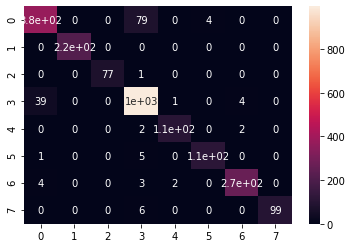

In [25]:
#Model 2:
XGBC_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred = XGBC_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

               precision    recall  f1-score   support

      Clarius       0.69      0.52      0.60       460
Coronavirucus       1.00      0.96      0.98       215
    Esequlius       0.90      0.46      0.61        78
       Marcus       0.73      0.90      0.81      1039
     Mongucus       0.97      0.88      0.92       110
   Paithonius       0.91      0.50      0.65       120
    Philippus       0.77      0.77      0.77       277
     Ubuntius       0.74      0.51      0.61       105

     accuracy                           0.77      2404
    macro avg       0.84      0.69      0.74      2404
 weighted avg       0.78      0.77      0.76      2404



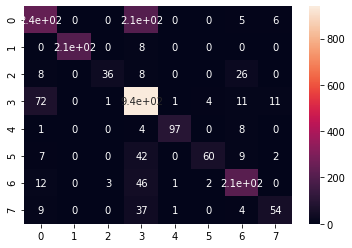

In [26]:
#Model 3:
SVC_model=svm.SVC(gamma=0.25).fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

               precision    recall  f1-score   support

      Clarius       0.94      0.96      0.95       460
Coronavirucus       0.98      1.00      0.99       215
    Esequlius       0.96      0.95      0.95        78
       Marcus       0.97      0.96      0.97      1039
     Mongucus       0.92      0.92      0.92       110
   Paithonius       0.96      0.95      0.95       120
    Philippus       0.93      0.95      0.94       277
     Ubuntius       0.93      0.92      0.93       105

     accuracy                           0.96      2404
    macro avg       0.95      0.95      0.95      2404
 weighted avg       0.96      0.96      0.96      2404



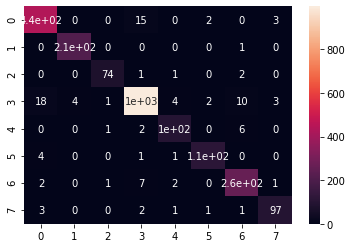

In [27]:
#Model 4:
tree_model=tree.DecisionTreeClassifier().fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

               precision    recall  f1-score   support

      Clarius       0.99      0.98      0.98       460
Coronavirucus       1.00      1.00      1.00       215
    Esequlius       0.99      0.96      0.97        78
       Marcus       0.98      1.00      0.99      1039
     Mongucus       1.00      0.96      0.98       110
   Paithonius       0.98      0.96      0.97       120
    Philippus       0.98      0.99      0.99       277
     Ubuntius       0.98      0.94      0.96       105

     accuracy                           0.99      2404
    macro avg       0.99      0.97      0.98      2404
 weighted avg       0.99      0.99      0.99      2404



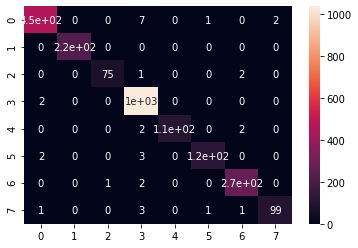

In [28]:
#Model 5:
randomforest_model=RandomForestClassifier().fit(X_train,y_train)
y_pred = randomforest_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


               precision    recall  f1-score   support

      Clarius       0.22      0.05      0.08       460
Coronavirucus       0.89      0.90      0.90       215
    Esequlius       0.00      0.00      0.00        78
       Marcus       0.52      0.95      0.67      1039
     Mongucus       0.86      0.65      0.74       110
   Paithonius       0.33      0.02      0.03       120
    Philippus       0.37      0.11      0.17       277
     Ubuntius       0.00      0.00      0.00       105

     accuracy                           0.54      2404
    macro avg       0.40      0.33      0.32      2404
 weighted avg       0.44      0.54      0.44      2404



/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


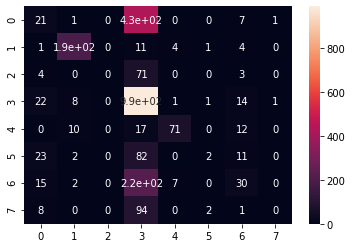

In [48]:
#model 6:
svm_linear_model=CalibratedClassifierCV(LinearSVC(),cv=3).fit(X_train,y_train)
y_pred = svm_linear_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


               precision    recall  f1-score   support

      Clarius       0.00      0.00      0.00       460
Coronavirucus       0.87      0.86      0.86       215
    Esequlius       0.00      0.00      0.00        78
       Marcus       0.49      0.97      0.65      1039
     Mongucus       0.77      0.78      0.77       110
   Paithonius       0.00      0.00      0.00       120
    Philippus       0.00      0.00      0.00       277
     Ubuntius       0.00      0.00      0.00       105

     accuracy                           0.53      2404
    macro avg       0.27      0.33      0.29      2404
 weighted avg       0.32      0.53      0.39      2404



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


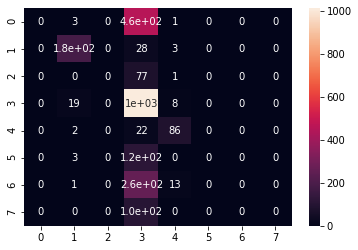

In [49]:
#model 7:
svm_rbf_model=CalibratedClassifierCV(SVC(kernel="poly",gamma="auto", max_iter=200),cv=3).fit(X_train,y_train)
y_pred = svm_rbf_model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

**Predictions:**

In [29]:
#Model 1:
y_pred_logistic = logistic_model.predict(test_dataset)
test_logistic = pd.DataFrame(y_pred_logistic)

In [30]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_logistic.to_csv(header=None)})
res.json()

{'accuracy': 0.5805042436345482,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

In [31]:
#Model 2:
y_pred_xgbc = XGBC_model.predict(test_dataset)
test_xgbc = pd.DataFrame(y_pred_xgbc)

In [32]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_xgbc.to_csv(header=None)})
res.json()

{'accuracy': 0.9347229156265602,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

In [33]:
#Model 3:
y_pred_svc = SVC_model.predict(test_dataset)
test_svc = pd.DataFrame(y_pred_svc)

In [34]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_svc.to_csv(header=None)})
res.json()

{'accuracy': 0.7636045931103345,
 'quote': "Close, but no cigar. It's a good begining. How can you improve it more? Maybe try some different models?"}

In [35]:
#Model 4:
y_pred_tree = tree_model.predict(test_dataset)
test_tree = pd.DataFrame(y_pred_tree)

In [36]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_tree.to_csv(header=None)})
res.json()

{'accuracy': 0.9573140289565651,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

In [37]:
#Model 5:
y_pred_forest = randomforest_model.predict(test_dataset)
test_forest = pd.DataFrame(y_pred_forest)

In [38]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_forest.to_csv(header=None)})
res.json()

{'accuracy': 0.9866450324513231,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

In [51]:
#model 6:
y_pred_svm_linear = svm_linear_model.predict(test_dataset)
test_svm_linear = pd.DataFrame(y_pred_svm_linear)

In [52]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_svm_linear.to_csv(header=None)})
res.json()

{'accuracy': 0.5464303544682976,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

In [53]:
#model 7:
y_pred_svm_rbf_model = svm_linear_model.predict(test_dataset)
test_svm_rbf_model = pd.DataFrame(y_pred_svm_rbf_model)

In [54]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_svm_rbf_model.to_csv(header=None)})
res.json()

{'accuracy': 0.5464303544682976,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [ ]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [ ]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)